In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [78]:
df = pd.read_csv('film.csv', encoding='latin1', delimiter=';')


In [79]:
df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
0,INT,INT,STRING,CAT,CAT,CAT,CAT,INT,BOOL,STRING
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
2,1991,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
3,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79,No,NicholasCage.png
4,1979,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6,No,seanConnery.png


In [80]:
#drop first row
df = df.drop([0])


In [81]:
df.head(1)

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png


In [82]:
#drop image column
df = df.drop(['*Image'], axis=1)


In [83]:
df

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No
2,1991,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68,No
3,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79,No
4,1979,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6,No
5,1978,94,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14,No
...,...,...,...,...,...,...,...,...,...
1655,1932,226,"Shadow of the Eagle, The",Action,"Wayne, John",NaN,NaN,19,No
1656,1989,103,Blood & Guns,Action,"Welles, Orson",NaN,NaN,43,No
1657,1988,78,Hot Money,Drama,"Welles, Orson",NaN,NaN,19,No
1658,1977,75,Comedy Tonight,Comedy,"Williams, Robin",NaN,NaN,18,No


In [84]:
df.isnull().sum()

Year            0
Length         67
Title           0
Subject         2
Actor           8
Actress       378
Director      253
Popularity      6
Awards          0
dtype: int64

In [85]:
df.fillna('', inplace=True)

In [86]:
df.isnull().sum()

Year          0
Length        0
Title         0
Subject       0
Actor         0
Actress       0
Director      0
Popularity    0
Awards        0
dtype: int64

In [87]:
selected_features = ['Title', 'Subject', 'Actor', 'Actress', 'Director']
data_subset = df[selected_features]

In [88]:
data_subset['combined_features'] = data_subset.apply(lambda row: ' '.join(row.values), axis=1)


C:\Users\huzai\AppData\Local\Temp\ipykernel_7852\2700587212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['combined_features'] = data_subset.apply(lambda row: ' '.join(row.values), axis=1)


In [89]:
# Use CountVectorizer to convert text data into a feature matrix
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(data_subset['combined_features'])


In [90]:
# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(feature_matrix)


In [91]:
# Create a DataFrame for the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Title'], columns=df['Title'])


In [92]:
def get_movie_recommendations(movie_title, top_n=10):
    similar_scores = cosine_sim_df[movie_title]
    similar_movies = similar_scores.sort_values(ascending=False).index[1:top_n+1]
    return similar_movies


In [99]:
df.head(1)

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No


In [100]:

# Example: Get top 10 recommendations for a specific movie
movie_title = 'Shakespeare Series' 
recommendations = get_movie_recommendations(movie_title, top_n=10)

for recommendation in recommendations:
    print('Recommendation ',recommendation)

Recommendation  Wheel of Fortune
Recommendation  Long Voyage Home, The
Recommendation  Wings of Eagles, The
Recommendation  Victory
Recommendation  Midnight Cowboy
Recommendation  Inserts
Recommendation  Arrowsmith
Recommendation  Darling
Recommendation  Rocky
Recommendation  Dillinger


C:\Users\huzai\AppData\Local\Temp\ipykernel_7852\4188034900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cosine_sim_df.loc[movie_title, recommendations], y=recommendations, palette='viridis')


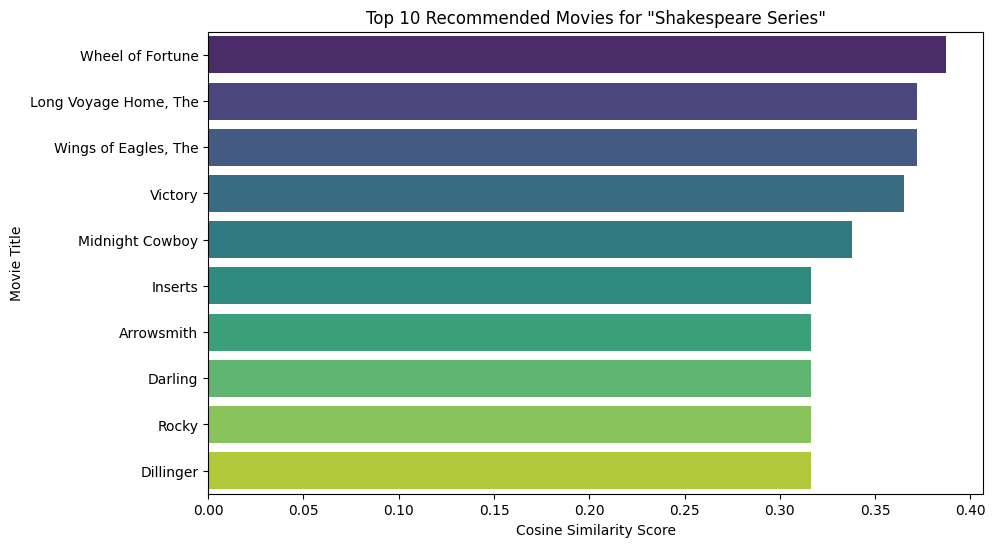

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cosine_sim_df.loc[movie_title, recommendations], y=recommendations, palette='viridis')
plt.title(f'Top 10 Recommended Movies for "{movie_title}"')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Movie Title')
plt.show()